---
title: "Causal Inference of Labor Market Inequality Using PGM: A multidimensional analysis of unemployment rate and durations"
author:
    name: Mengjia Wei
    email: mw1296@georgetown.edu
    affiliation: Georgetown University
keywords:
  - PGM
  - Unemployment Rate
  - Unemployment Durations
  - Causal Inference
abstract: |
  This study investigates the causal relationships between age, occupation, race, and unemployment rates in the United States, applying probabilistic graphical modeling (PGM) to uncover latent dependency structures across demographic and industry variables. Using a PGM framework, we extend this approach to labor market data by constructing conditional dependence networks across two key dimensions: time (2015, 2024 and 2025) and group attributes (age, race, and industry). Specifically, the study examines recent college graduates (ages 22–24) relative to older individuals (25+), comparing their unemployment rates by major across 2024 and 2025. A second dimension of analysis focuses on industry-specific unemployment rate dynamics from 2015 to 2025, particularly in [retail], [arts], and [technology] sectors, and how these intersect with racial and age groups. In addition to rate-based measures, the study explores how unemployment duration has evolved between 2015 and 2025 across different occupations and age cohorts. This analysis seeks to identify whether certain groups—such as []—face longer or shorter periods of unemployment today compared to a decade ago, providing a more comprehensive view of labor market hardship. The model estimates the strength and direction of probabilistic dependencies using Bayesian structure learning algorithms, based on labor force aggregated data from BLS CPS datasets. The results indicate that recent college graduates in [] majors had a higher unemployment rate of [ ]% in 2025 H1 compared to [ ]% in 2024 H1. Additionally, the [retail], [arts], and [technology] industries experienced increased unemployment rates between 2015 and 2025, with respective changes of [ ], [ ], and [ ] percentage points. The findings also suggest that, consistent with earlier research, unemployment duration is negatively correlated with the unemployment rate by occupation, with industries exhibiting higher unemployment often associated with shorter average durations (Chien, Y., & Morris, P., 2016). The PGM framework reveals significant interactive effects between race and industry on unemployment, particularly among [e.g., Black or Hispanic workers] in the [e.g., retail or hospitality] sector. These findings contribute to the growing literature that leverages PGMs for social inference (e.g., Li et al., 2022), highlighting the model’s potential for uncovering structural labor inequalities over time and across population subgroups.
plain-language-summary: |
  TBD
key-points:
  - TBD
  - TBD
date: last-modified
bibliography: references.bib
citation:
  container-title: Georgetown Univeristy DSAN 5650 Journal
number-sections: true
jupyter: python3
---

## Introduction

The interplay of demographic characteristics and labor market dynamics consistently reveals significant disparities in unemployment rates. Decades of research reveal a persistent relationship between race, gender, and unemployment, evident across diverse economic cycles. Though the Black unemployment rate fell to a historic low of 6.1% in 2019, it was still twice as high as the White unemployment rate of 3.0%, as @ValerieWilson2022 observed. These disparities are further magnified at the intersection of race and gender. For instance, Black men faced a 6.1% unemployment rate in February 2024, notably higher than Black women at 4.4%. Similarly, Hispanic women's unemployment rate increased to 5.0% in February 2024, while Hispanic men experienced a decrease to 4.0% (@Joseph2024). Native American men also experienced higher unemployment (10%) than Native American women (7%) in 2022. Industry-specific analyses similarly highlight divergent unemployment trends. The Leisure and Hospitality sector reported the highest unemployment rate at 6.0% in 2024, an increase from 5.5% in 2023. Similarly, Wholesale and Retail Trade experienced elevated unemployment, reaching 4.7% in October 2024, up from 4.0% in 2023. Conversely, Financial Activities maintained a significantly lower unemployment rate of 1.9% (@Oberlo2024). 

Research from the U.S. Bureau of Labor Statistics consistently shows longer unemployment spells in sectors such as Manufacturing and Construction, while industries demanding specialized skills like Education and Health Services exhibit shorter durations. Study by @YiLiChienandPaulMorris reveals negative correlation between the unemployment rate and duration. Such variations in both the rate and duration of unemployment underscore complex interactions among race, gender, age, and industry.

@TOIEducation2025 published that the labor market for recent college graduates has "deteriorated noticeably" in the first quarter of 2025. The unemployment rate for this cohort (ages 22-27) ranged from 5.5% to 7.1%, exceeding the overall national average of 4.1-4.2%, with Anthropology (9.4%), Physics (7.8%), and Computer Engineering (7.5%) showing among the highest rates. 

![Unemployment Rate of Recent College Graduates](images/unemployment_rate_recent_graduate.png){#fig-graduates}

Although the Federal Open Market Committee (FOMC) reported a low overall unemployment rate for June 2025, recent data clearly indicate a noticeable uptick in the unemployment rate for the 22-27 age group since March, reaching 2021 levels and particularly affecting recent college graduates (@fig-graduates). 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data pre-processing
# 1. Merge several unemployment statistics excel files downlaoded from BLS webiste
import pandas as pd
import os
#os.getcwd()

def create_df_race(folder_path, demographic_type, id_vars, var_name, value_name):
    merged_df = pd.DataFrame()
    file_name = [f.removesuffix('.xlsx') for f in os.listdir(os.path.join("../data", folder_path)) if f.endswith('.xlsx')]
    for f in file_name:
        file_path = os.path.join("../data", folder_path, f + ".xlsx")    
        df = pd.read_excel(file_path)
        rows = df[df.iloc[:,0]=='Year'].index[0]+2-1
        df = pd.read_excel(file_path, skiprows=rows)
        df_long = df.melt(id_vars=id_vars, var_name=var_name, value_name=value_name)
        df_long[demographic_type] = f
        merged_df = pd.concat([merged_df, df_long], ignore_index=True)
    return merged_df

folder_path_list = ["unemployment_rate_by_race",
             "unemployment_rate_by_sex",
             "unemployment_rate_by_industry",
             "unemployment_rate_by_age",
            "unemployment_rate_by_education_attainment"]

demographic_type_list = ['Race',
                    'Sex',
                    'Industry',
                    'Age',
                    'Education_attainment']

d_vars="Year"
var_name="Month"
value_name="Unemployment_rate"

df_dic = {}
for i in range(0, len(folder_path_list)):
    folder_path = folder_path_list[i]
    demographic_type=demographic_type_list[i]
    merged_df = create_df_race(folder_path, demographic_type, "Year", "Month", "Unemployment_rate")
    df_dic[demographic_type] = merged_df

#list(df_dic.values())[0]

## EDA
### Unemployment Rates of Differenet Demographics

Unemployment Rate Distribution Histograms By Race


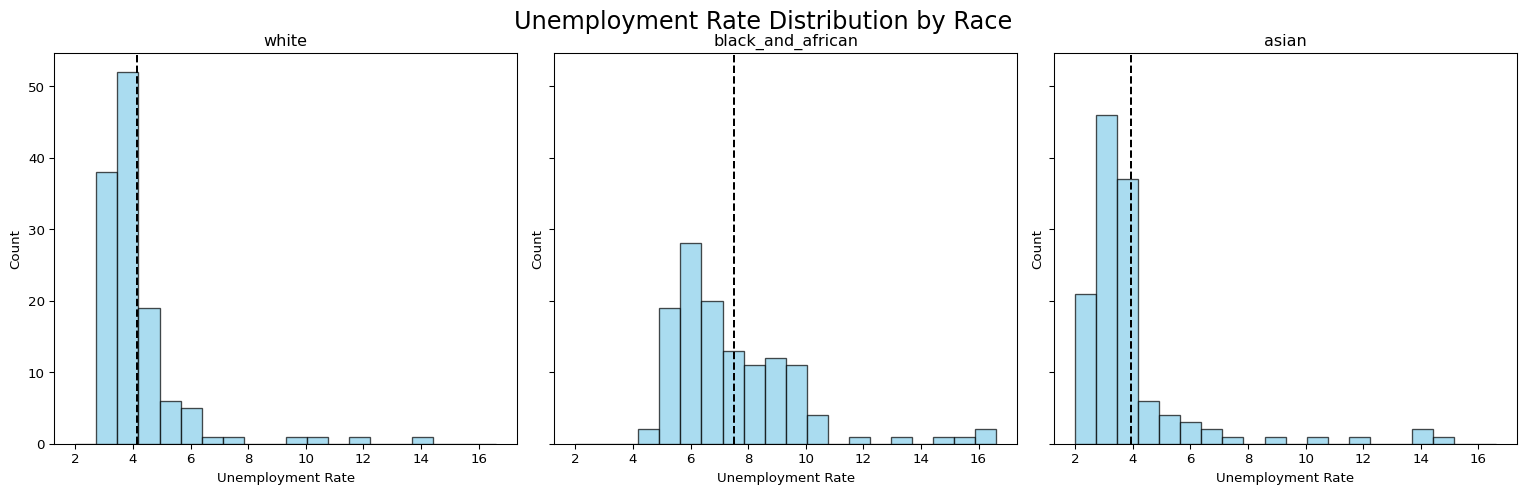

Unemployment Rate Distribution Histograms By Sex


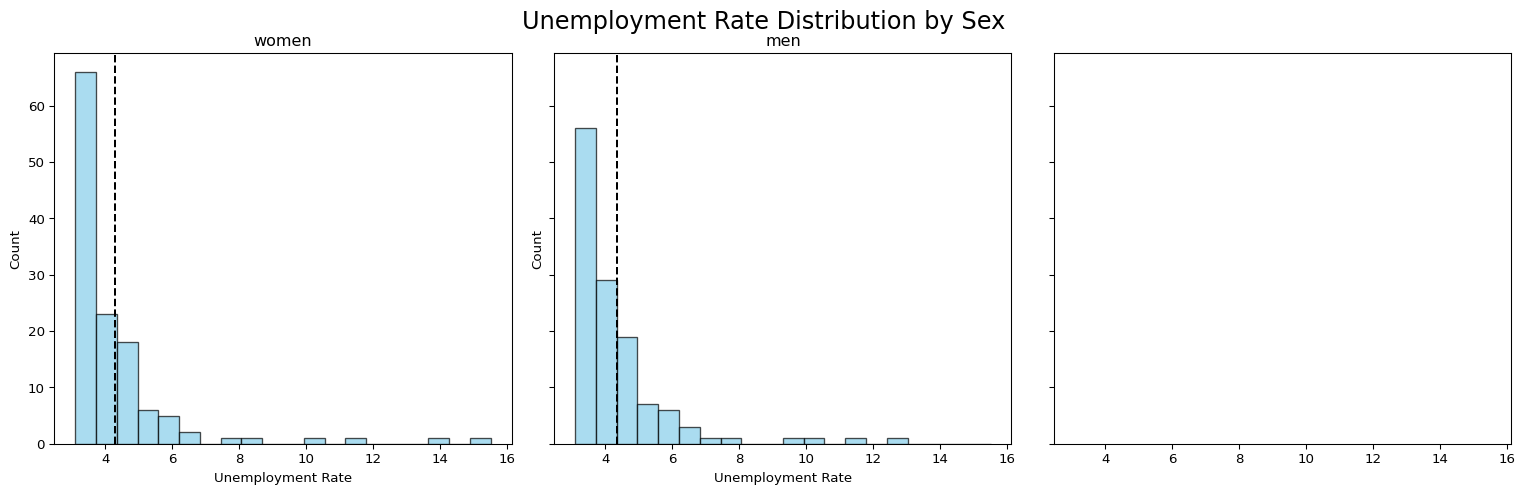

Unemployment Rate Distribution Histograms By Industry


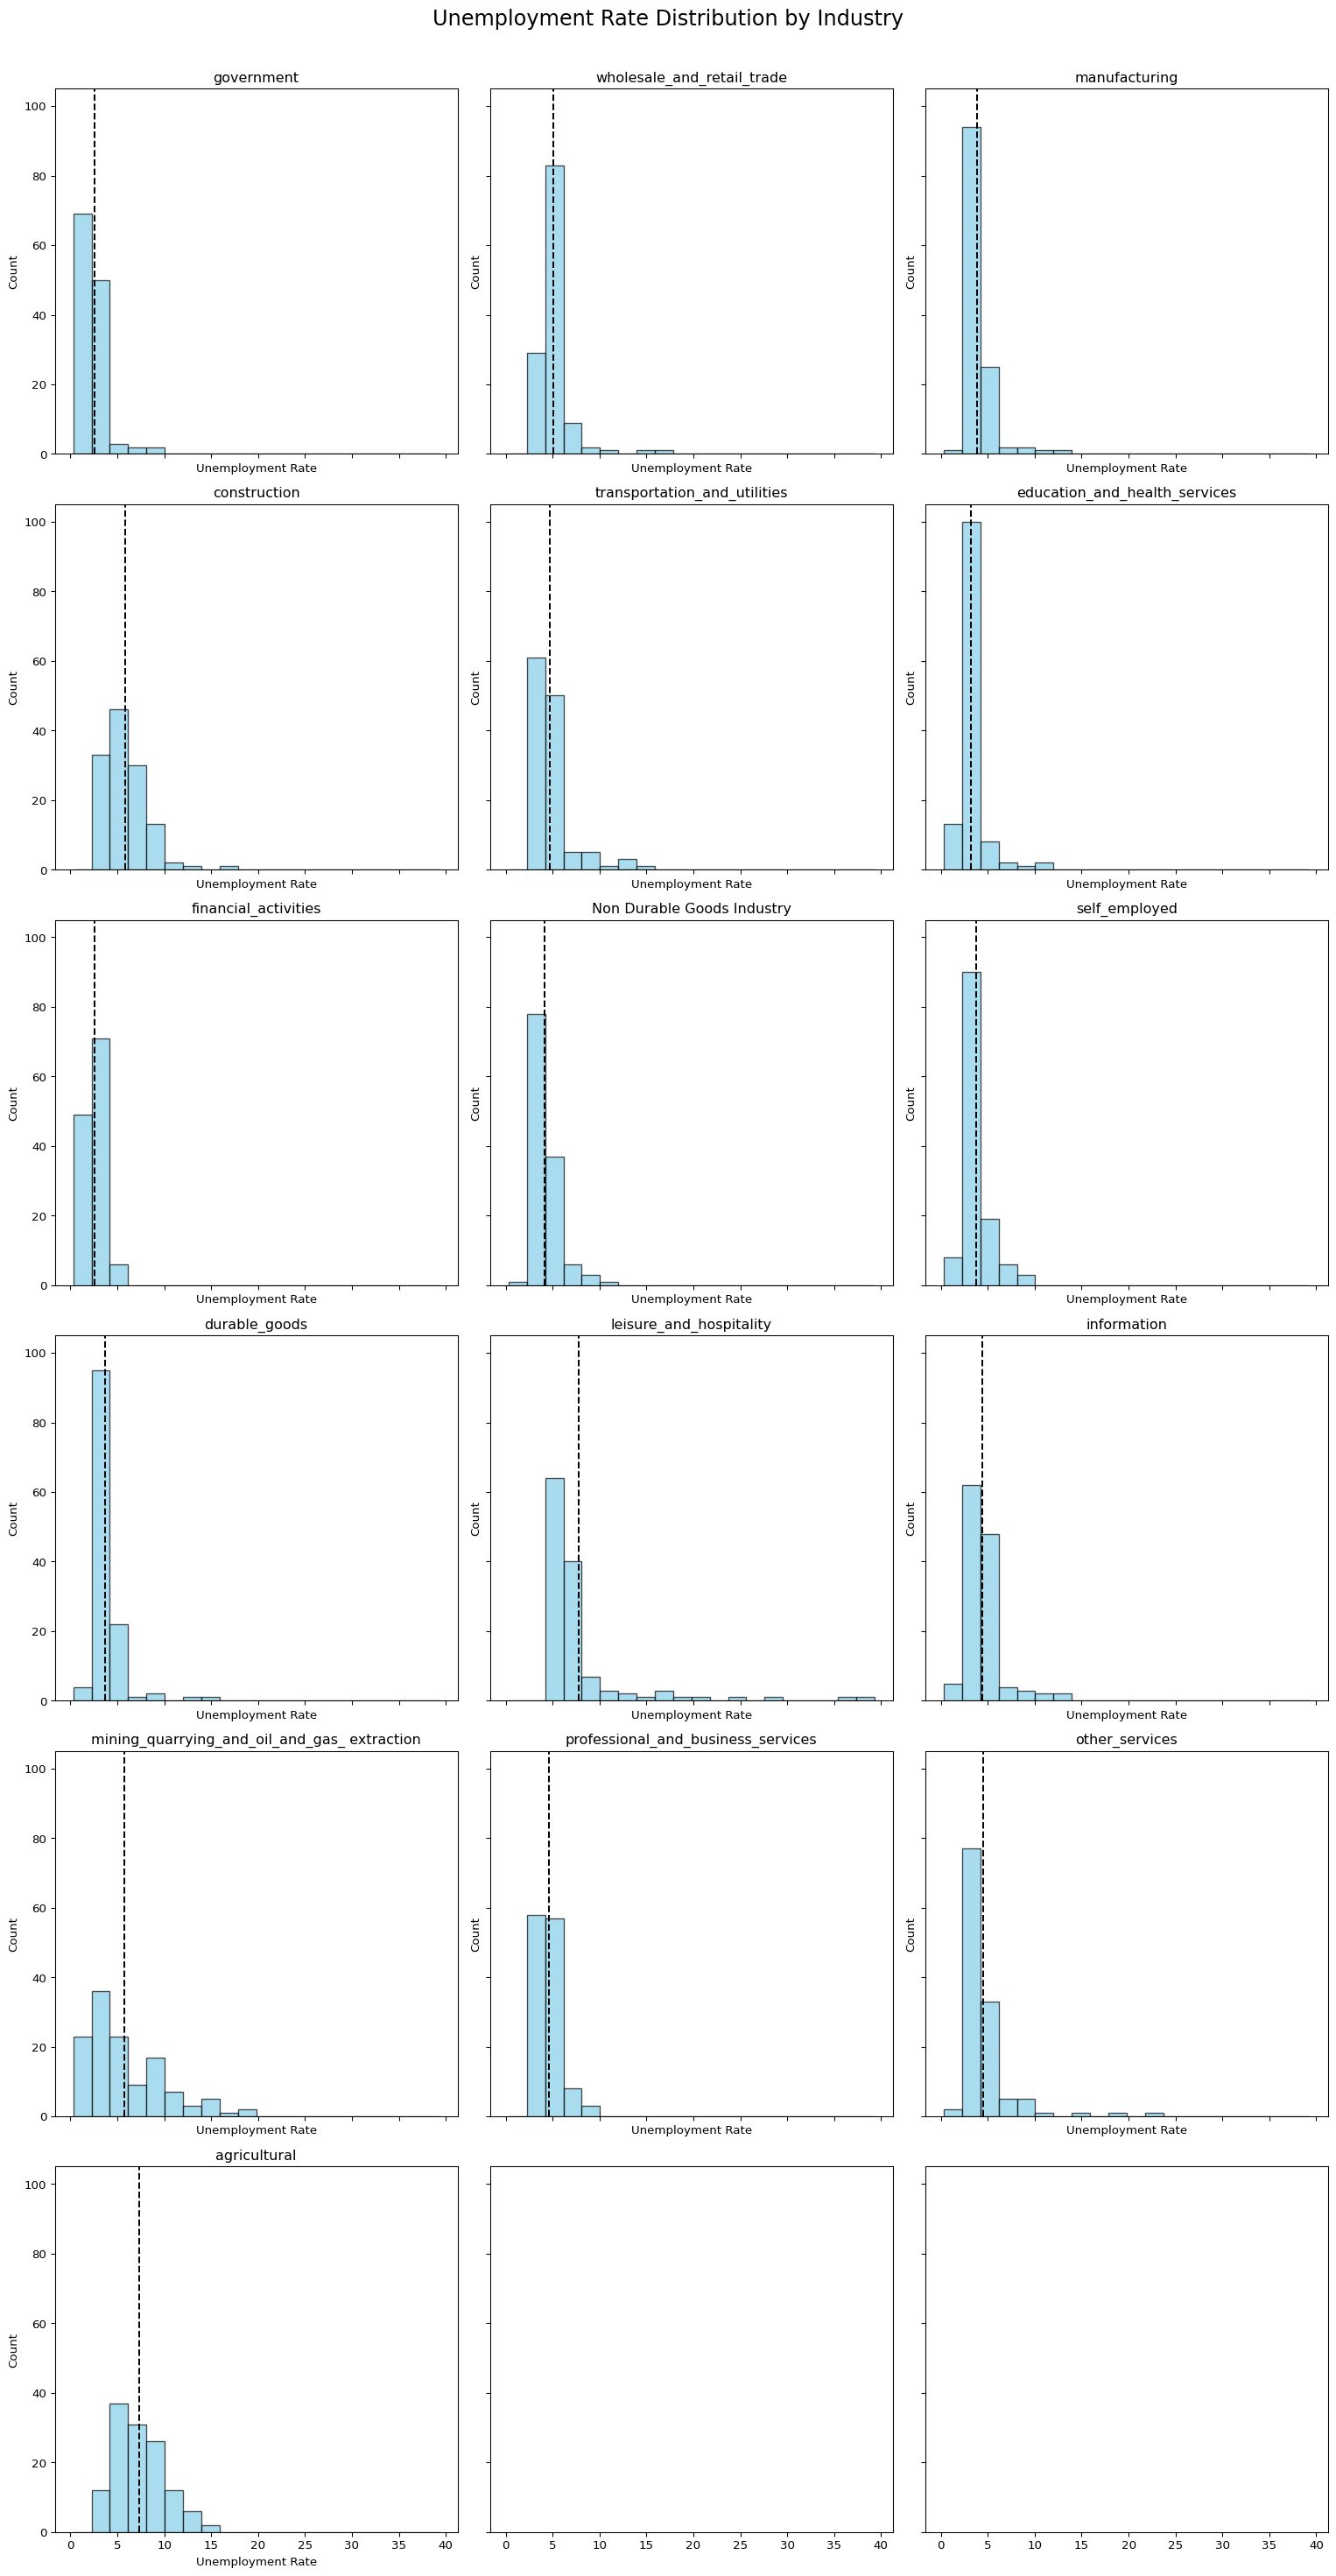

Unemployment Rate Distribution Histograms By Age


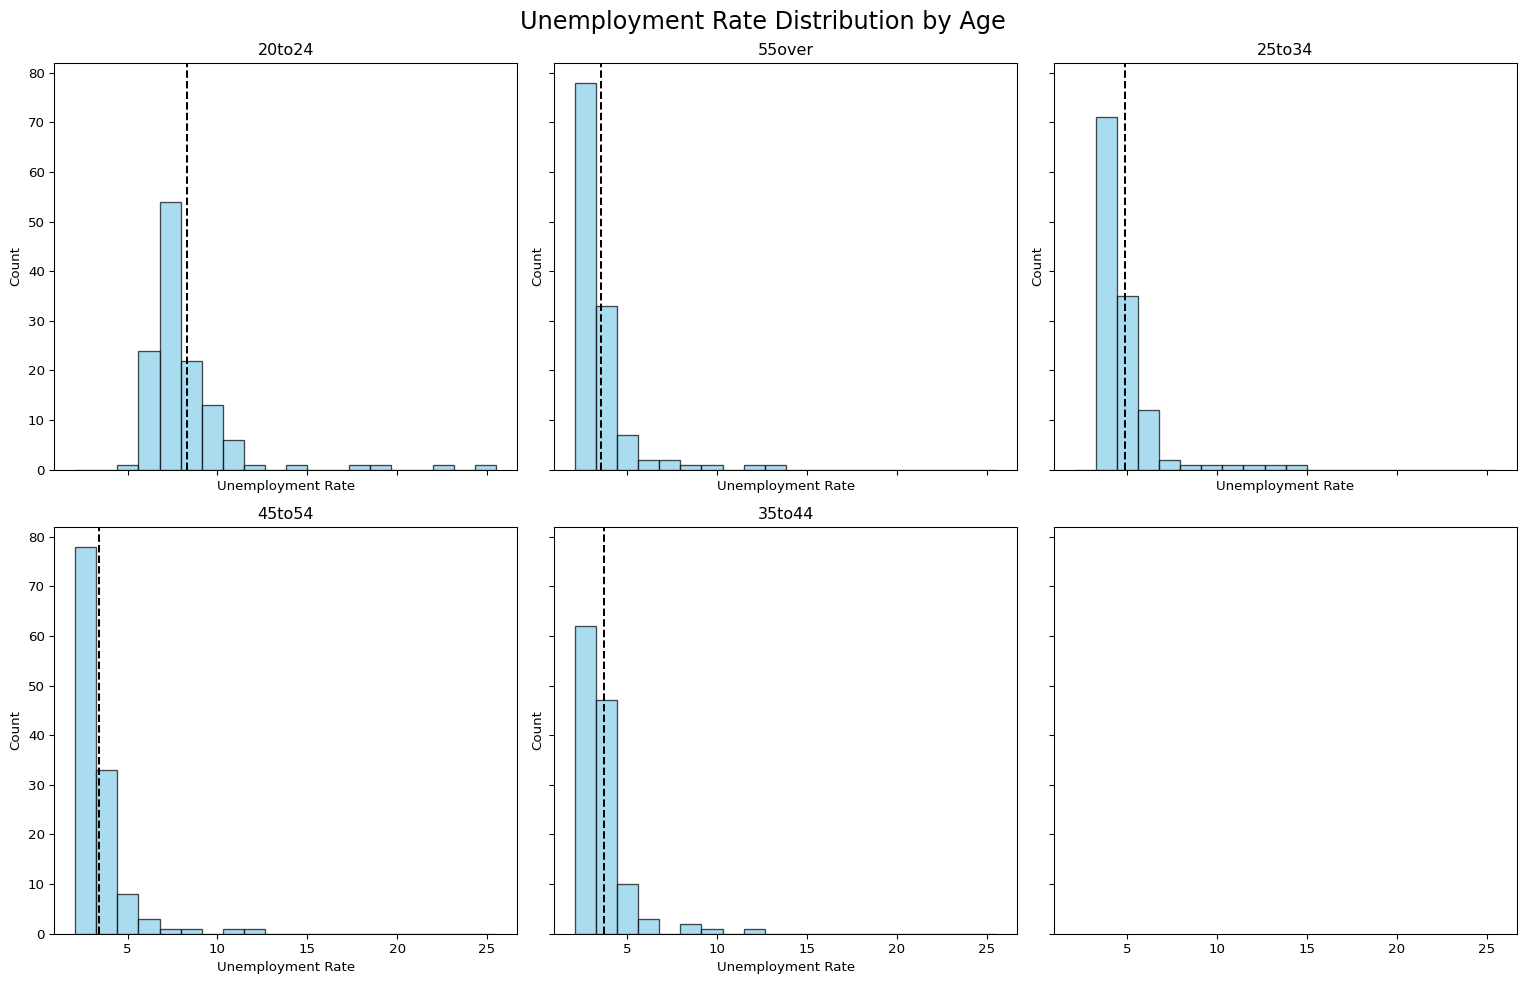

In [3]:
# Plot the distributions of unemployment stats of different demographic categories 

## 1. Plot the umemployment rate distributions by gender, age, industry, education_unattainment
import matplotlib.pyplot as plt
import numpy as np

def plot_hist(df_plot, demographic_type):
    unique_categories = df_plot[demographic_type].unique()
    num_unique_categories = len(unique_categories)
    ncol = 3
    nrow = np.int64(np.ceil(num_unique_categories/ncol))
    fig, axes = plt.subplots(ncols=ncol, nrows=nrow, sharex=True, sharey=True, figsize = (16,nrow*5))
    axes = axes.flatten()
    min_rate = df_plot['Unemployment_rate'].min()
    max_rate = df_plot['Unemployment_rate'].max()
    num_bins = 20 
    bins = np.linspace(min_rate, max_rate, num_bins + 1)
    for i, category in enumerate(unique_categories):
        ax = axes[i]
        vals = df_plot[df_plot[demographic_type]==category]['Unemployment_rate']
        ax.hist(vals, bins=bins, alpha=0.7, color='skyblue', edgecolor='black')
        ax.axvline(np.mean(vals), color = 'black', linestyle = "--")
        ax.set_title(category, fontsize=12)
        ax.set_xlabel('Unemployment Rate', fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
    plt.tight_layout()
    plt.suptitle(f'Unemployment Rate Distribution by {demographic_type}', y=1.02, fontsize=18) 
    plt.show()

# Show the graphs except for the last one in order to add the ariticle label to the last grapph
for i in range(0, len(df_dic.keys())-1):
    df_plot = list(df_dic.values())[i]
    demographic_type = list(df_dic.keys())[i]
    print(f"Unemployment Rate Distribution Histograms By {demographic_type}")
    plot_hist(df_plot, demographic_type)


Unemployment Rate Distribution Histograms By Education_attainment


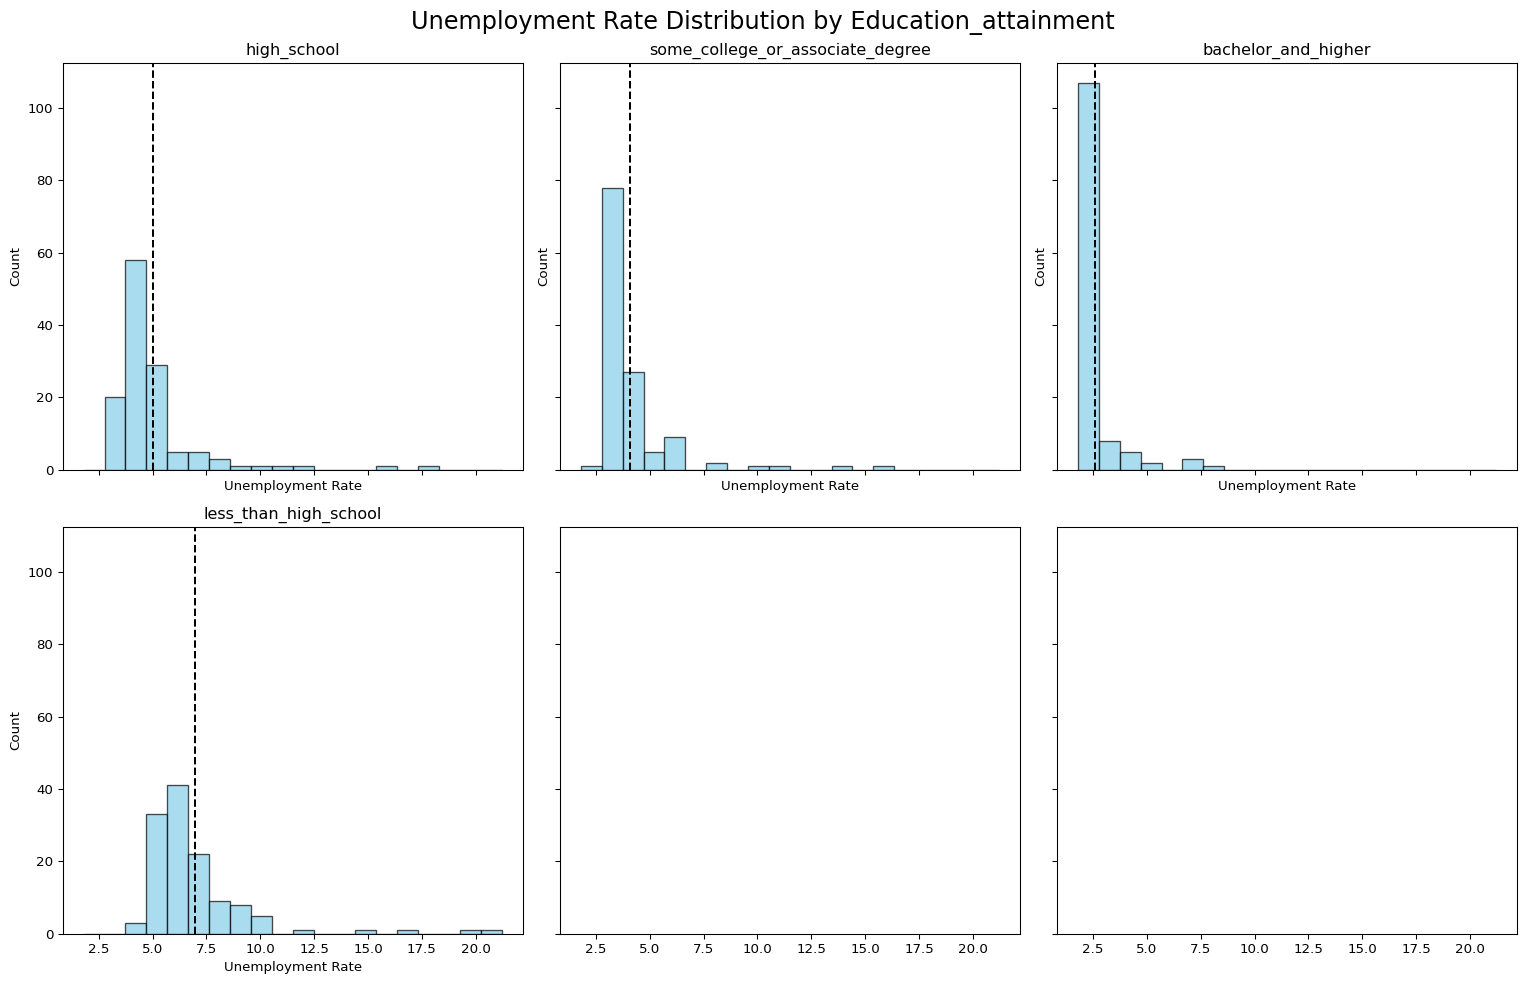

In [4]:
#| label: fig-histogram-unemployment-rate-demographics
#| fig-cap: Unemployment Rate Distributions By Demographics (2015-2025 statistics)
#| fig-alt: Histogram plots of the unemployment rate distributins by Age, Sex, Race, Industry and Education Attainment using 2015-2025 BLS data
df_plot = list(df_dic.values())[len(df_dic.keys())-1]
demographic_type = list(df_dic.keys())[len(df_dic.keys())-1]
print(f"Unemployment Rate Distribution Histograms By {demographic_type}")
plot_hist(df_plot, demographic_type)

BLS data from 2015–2025 shows the Black or African American group with the highest average unemployment rate (7.5%), mostly between 5–10%. Gender differences are minimal, with both sexes averaging around 5%, though men slightly higher. Leisure and Hospitality leads industries with the highest rate (10%) and a long-tail distribution. Agriculture follows with 5–11% and moderate variation. Construction and Mining/Oil & Gas show similar but slightly lower patterns. Financial Activities has the lowest and most stable unemployment, concentrated below 5% (@fig-histogram-unemployment-rate-demographics).


In [5]:
import matplotlib.pyplot as plt
import numpy as np
eruptions = [1492, 1585, 1646, 1677, 1712, 1949, 1971, 2021]

$$
p(x) = \frac{e^{-\lambda} \lambda^{x}}{x !}
$$ {#eq-poisson}

where $\lambda$ is the rate of eruptions per year. Using @eq-poisson, the probability of an eruption in the next $t$ years can be calculated.

| Name                | Year |
|---------------------|------|
| Current             | 2021 |
| Teneguía            | 1971 |
| Nambroque           | 1949 |
| El Charco           | 1712 |
| Volcán San Antonio  | 1677 |
| Volcán San Martin   | 1646 |
| Tajuya near El Paso | 1585 |
| Montaña Quemada     | 1492 |

: Recent historic eruptions on La Palma {#tbl-history}

@tbl-history summarises the eruptions recorded since the colonization of the islands by Europeans in the late 1400s.

![Map of La Palma](images/la-palma-map.png){#fig-map}

La Palma is one of the west most islands in the Volcanic Archipelago of the Canary Islands (@fig-map).

{{< embed notebooks/data-screening.qmd#fig-spatial-plot >}}

@fig-spatial-plot shows the location of recent Earthquakes on La Palma.

Data and methods are discussed in @sec-data-methods.

Let $x$ denote the number of eruptions in a year. Then, $x$ can be modeled by a Poisson distribution

## Data & Methods {#sec-data-methods}

## Conclusion

## References {.unnumbered}

::: {#refs}
:::